# Montando Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualizando Datos con MatPlotLib

In [2]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.style
plt.style.use('ggplot')
# plt.style.use('seaborn')
# plt.style.use('fivethirtyeight')

In [4]:
pip install yfinance --upgrade --no-cache-dir

In [5]:
import yfinance as yf

In [6]:
data = yf.download('TSLA', interval='1d', start='2022-01-01', end='2022-02-11')

[*********************100%***********************]  1 of 1 completed


In [7]:
data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1147.750000,1201.069946,1136.040039,1199.780029,1199.780029,34643800
2022-01-04,1189.550049,1208.000000,1123.050049,1149.589966,1149.589966,33416100
2022-01-05,1146.650024,1170.339966,1081.010010,1088.119995,1088.119995,26706600


In [11]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
# Convirtiendo Date Column (str) to DateTime
# No es necesario en caso de que ya este formateado
data['Date'] = pd.to_datetime(data['Date'])

# Estableciendo la columna 'Date' como el index
data = data.set_index['Date']

In [12]:
data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1147.750000,1201.069946,1136.040039,1199.780029,1199.780029,34643800
2022-01-04,1189.550049,1208.000000,1123.050049,1149.589966,1149.589966,33416100
2022-01-05,1146.650024,1170.339966,1081.010010,1088.119995,1088.119995,26706600


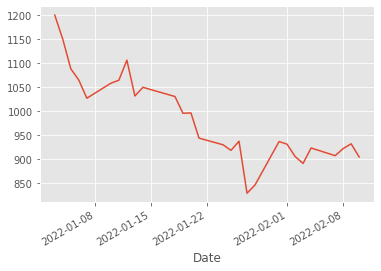

In [13]:
data['Close'].plot()

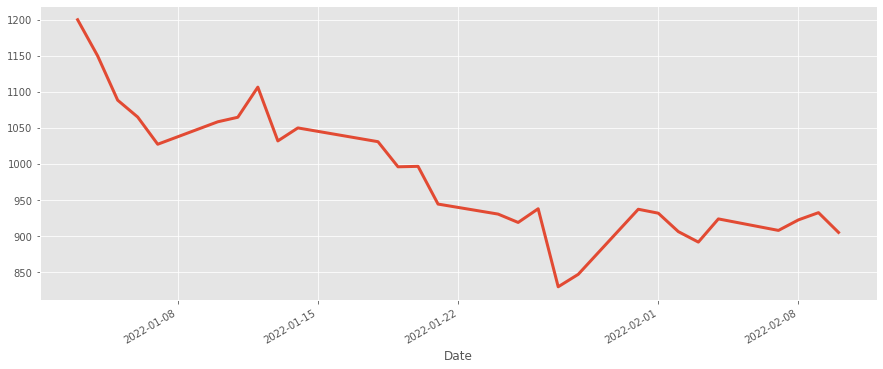

In [14]:
data['Close'].plot(figsize=(15,6), lw=3)

Ahora vamos a plotear múltiples graficos (precio y volumen) dentro del mismo plot, usaremos ***. Subplot2grid *** que es una forma más fácil y conveniente de plotear múltiples gráficos, en lugar de usar * .subplot * que es más complejo de entender.

# Entendiendo **Subplot2grid**:

* Se crea el 1er grafico (top)
* shape=( *filas , columnas* ): Crea una CUADRICULA, la cual podemos controlar despues usando 'rowspan' y 'colspan' 
* loc=( *filas , columnas* ): Es la localizacion respecto a el Index de cada grafico en la cuadricula (shape). 

El orden en el que cuenta los cuadros y la localizacion en la cuadricula es de izquierda a derecha, y desde arriba hacia abajo, empezando desde el index **0**. Por ejemplo en una cuadricula 4x4 *(shape=(4,1))*, para plotear el grafico desde el inicio de la caudricula, 

Seria: Index de la Fila 0, e Index de la columna 0, y el grafico inferior, 

Seria: Index de la Fila 3, e Index de la columna 0, y el grafico inferior

Los atributos *rowspan* y *colspan*, especifican a cuantos cuadros en la cuadricula el grafico se va a expander

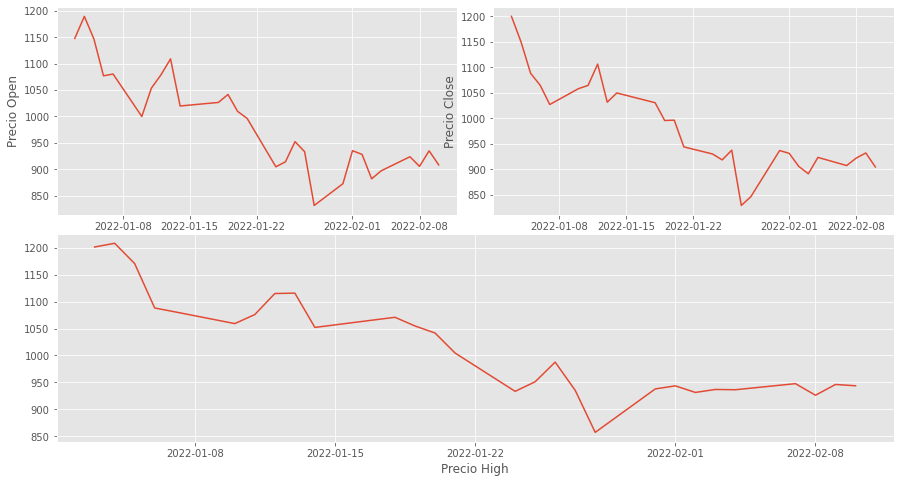

In [16]:
graf_sup_izq = plt.subplot2grid(shape=(4,4), loc=(0,0), rowspan=2, colspan=2)
graf_sup_izq.plot(data.index, data['Open'])
graf_sup_izq.set_ylabel('Precio Open')

graf_sup_der = plt.subplot2grid(shape=(4,4), loc=(0,2), rowspan=2, colspan=2)
graf_sup_der.plot(data.index, data['Close'])
graf_sup_der.set_ylabel('Precio Close')

graf_inferior = plt.subplot2grid(shape=(4,4), loc=(2,0), rowspan=2, colspan=4)
graf_inferior.plot(data.index, data['High'])
graf_inferior.set_xlabel('Precio High')

plt.gcf().set_size_inches(15,8)

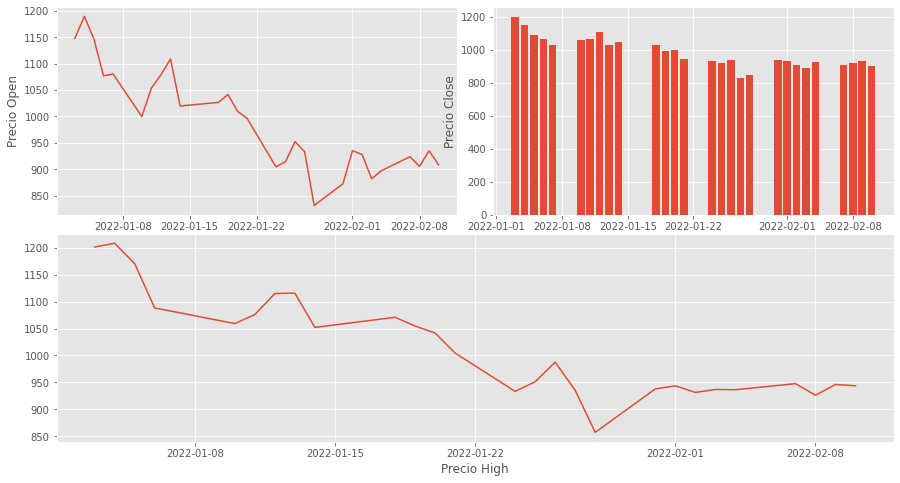

In [17]:
graf_sup_izq = plt.subplot2grid(shape=(4,4), loc=(0,0), rowspan=2, colspan=2)
graf_sup_izq.plot(data.index, data['Open'])
graf_sup_izq.set_ylabel('Precio Open')

graf_sup_der = plt.subplot2grid(shape=(4,4), loc=(0,2), rowspan=2, colspan=2)
graf_sup_der.bar(data.index, data['Close'])
graf_sup_der.set_ylabel('Precio Close')

graf_inferior = plt.subplot2grid(shape=(4,4), loc=(2,0), rowspan=2, colspan=4)
graf_inferior.plot(data.index, data['High'])
graf_inferior.set_xlabel('Precio High')

plt.gcf().set_size_inches(15,8)

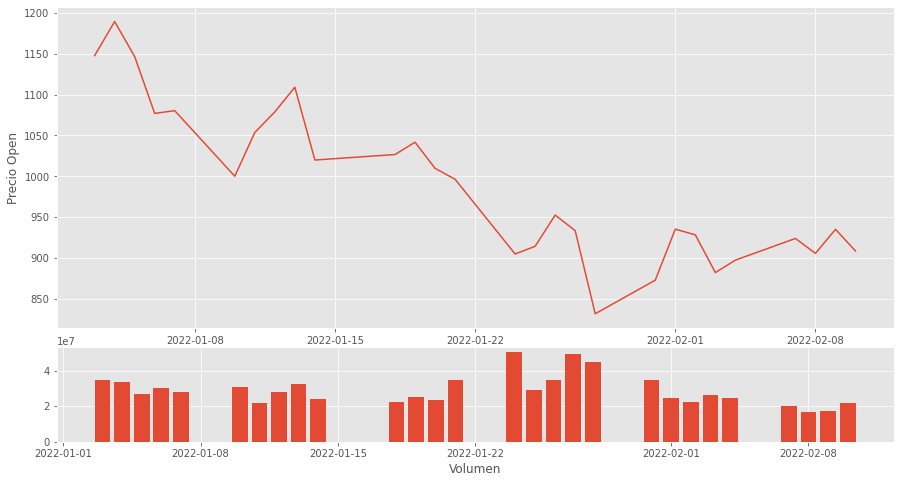

In [21]:
graf_sup_izq = plt.subplot2grid(shape=(4,4), loc=(0,0), rowspan=3, colspan=4)
graf_sup_izq.plot(data.index, data['Open'])
graf_sup_izq.set_ylabel('Precio Open')

# graf_sup_der = plt.subplot2grid(shape=(4,4), loc=(0,2), rowspan=2, colspan=2)
# graf_sup_der.plot(data.index, data['Close'])
# graf_sup_der.set_ylabel('Precio Close')

graf_inferior = plt.subplot2grid(shape=(4,4), loc=(3,0), rowspan=1, colspan=4)
graf_inferior.bar(data.index, data['Volume'])
graf_inferior.set_xlabel('Volumen')

plt.gcf().set_size_inches(15,8)

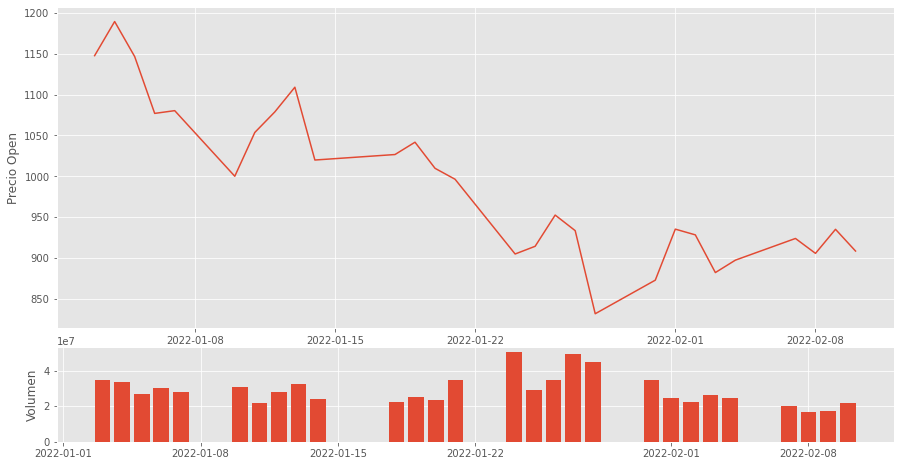

In [24]:
graf_sup_izq = plt.subplot2grid(shape=(4,1), loc=(0,0), rowspan=3, colspan=4)
graf_sup_izq.plot(data.index, data['Open'])
graf_sup_izq.set_ylabel('Precio Open')

graf_inferior = plt.subplot2grid(shape=(4,1), loc=(3,0), rowspan=1, colspan=4)
graf_inferior.bar(data.index, data['Volume'])
graf_inferior.set_ylabel('Volumen')

plt.gcf().set_size_inches(15,8)

# Visualizando OHLC con Matplotlib y Matplotlib Finance
####OHLC Sigifica Open High Low Close, plotearemos en velas o *candle sticks*

Usaremos la libreria ***mplfinance*** (anteriormente: mpl-finance)

**IMPORTANTE:** Seguir esta guia tambien! https://github.com/matplotlib/mplfinance (muestra mas detalladamente como se va agregando Medias Moviles y Volumen, tambien muestra otros tipos de plots para time series financiero)

In [25]:
pip install mplfinance

     |████████████████████████████████| 70 kB 4.7 MB/s 


In [26]:
import mplfinance as mpf

# Visualizando OHLC en Barras

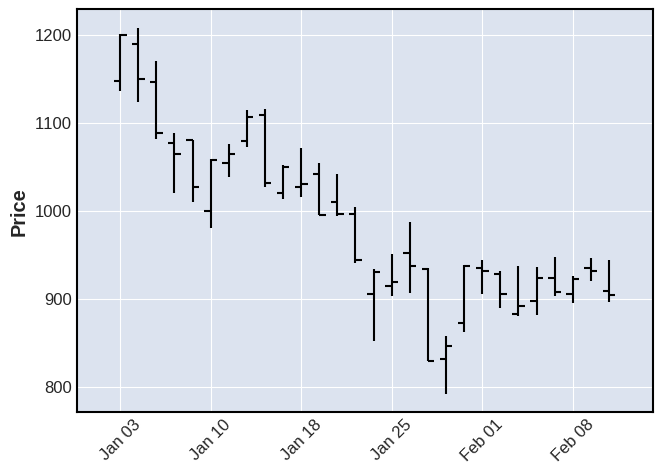

In [27]:
# Visualizando todo el dataset
mpf.plot(data)

# Si no estas usando jupyter, no olvides agregar la siguiente línea para visualizar este y los siguientes graficos
# plt.show()

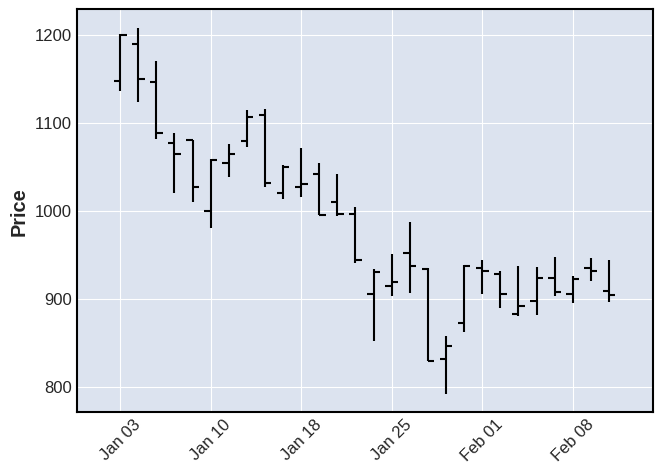

In [30]:
# Visualiando solamente una parte del dataset
mpf.plot(data['2022':])

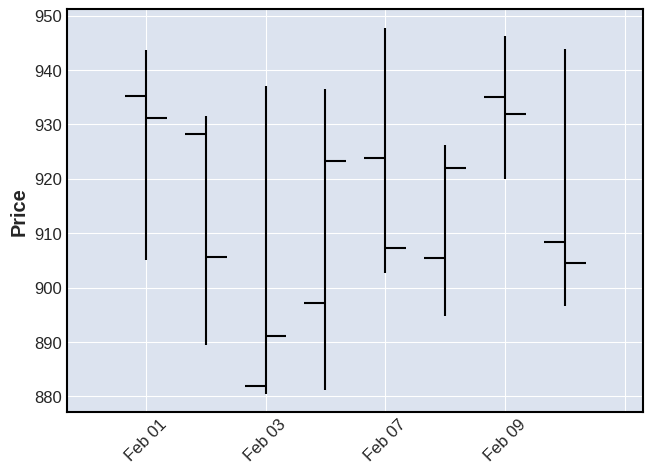

In [29]:
# Visualiando solamente una parte del dataset
mpf.plot(data['2022-02':])

# Visualizando OHLC en VELAS (Candlesticks)


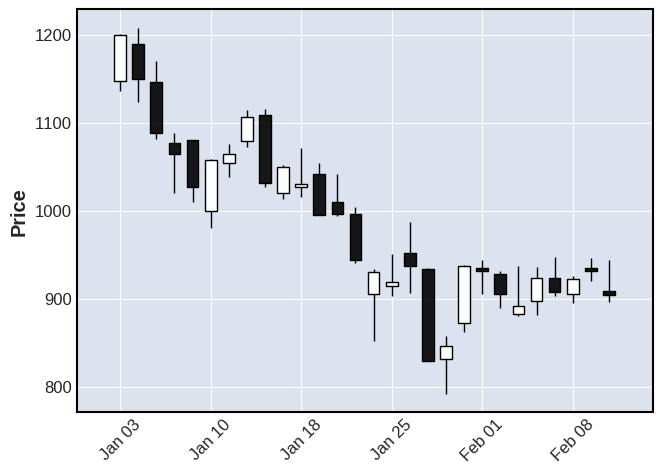

In [31]:
mpf.plot(data, type='candle')

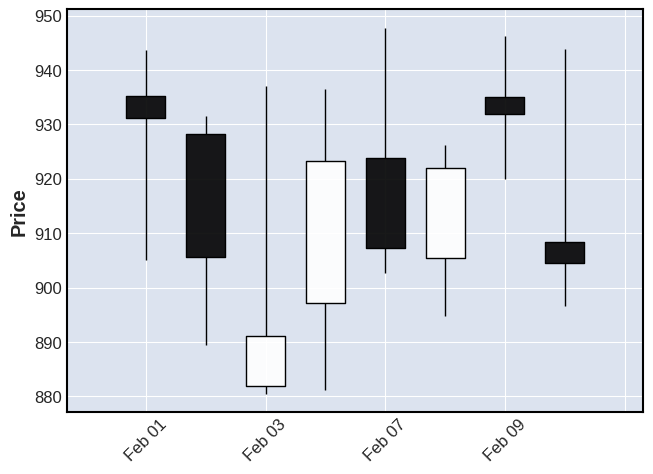

In [34]:
mpf.plot(data['2022-02':], type='candle')

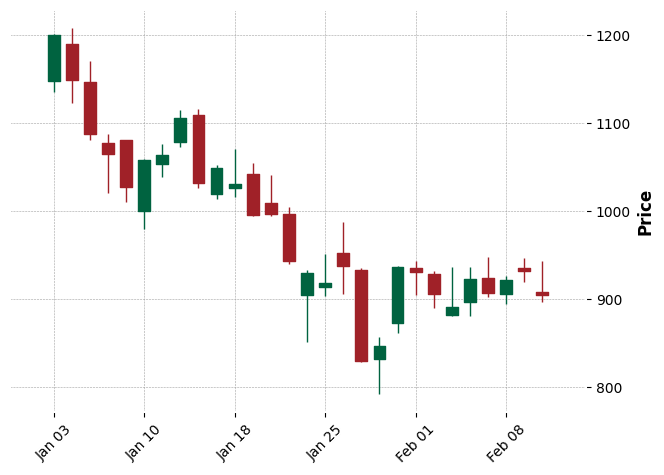

In [35]:
# Cambiando estilo o colores
mpf.plot(data, type='candle', style='charles')

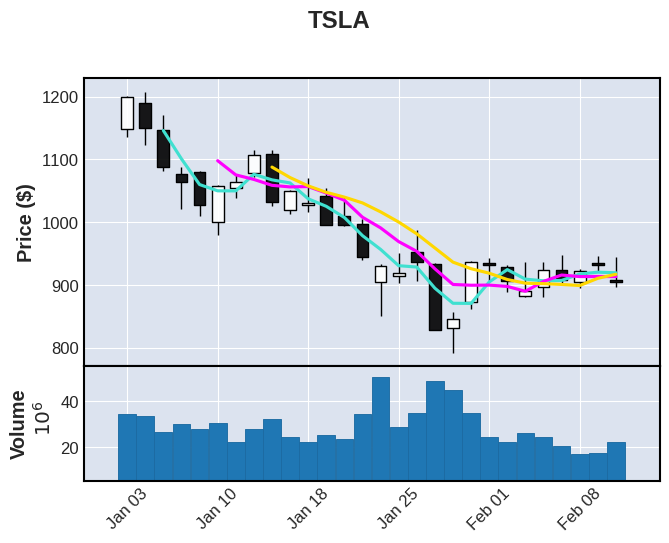

In [44]:
# Agregar titulo y etiquetas al grafico
mpf.plot(data['2022':], type='candle',
         title='TSLA',
         ylabel='Price ($)',
         ylabel_lower='Volume',
         volume=True,
         mav=(3,6,9)
         # savefig='test-mplfiance.png'
         )
# Moving Average (MAV) o Media Movil

# Estilos Varios en mplfinance

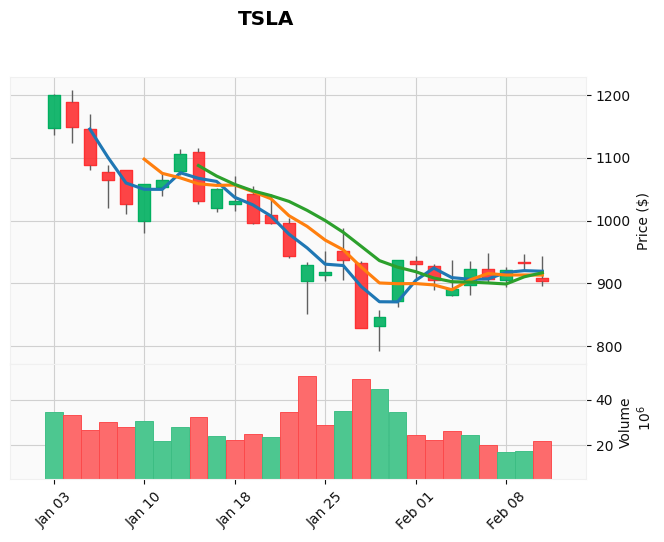

In [56]:
mpf.plot(data['2022':],
         type='candle',
         # style='nightclouds', # Black Neon 1 style
         # style='classic', # Black & White style
         # style='charles', # Green/Red Style
         # style='mike', # Black Neon 2 style
         style='yahoo', # Green/Red Better Style
         title='TSLA',
         ylabel='Price ($)',
         ylabel_lower='Volume',
         volume=True,
         
         mav=(3,6,9), # Moving Averages
         )

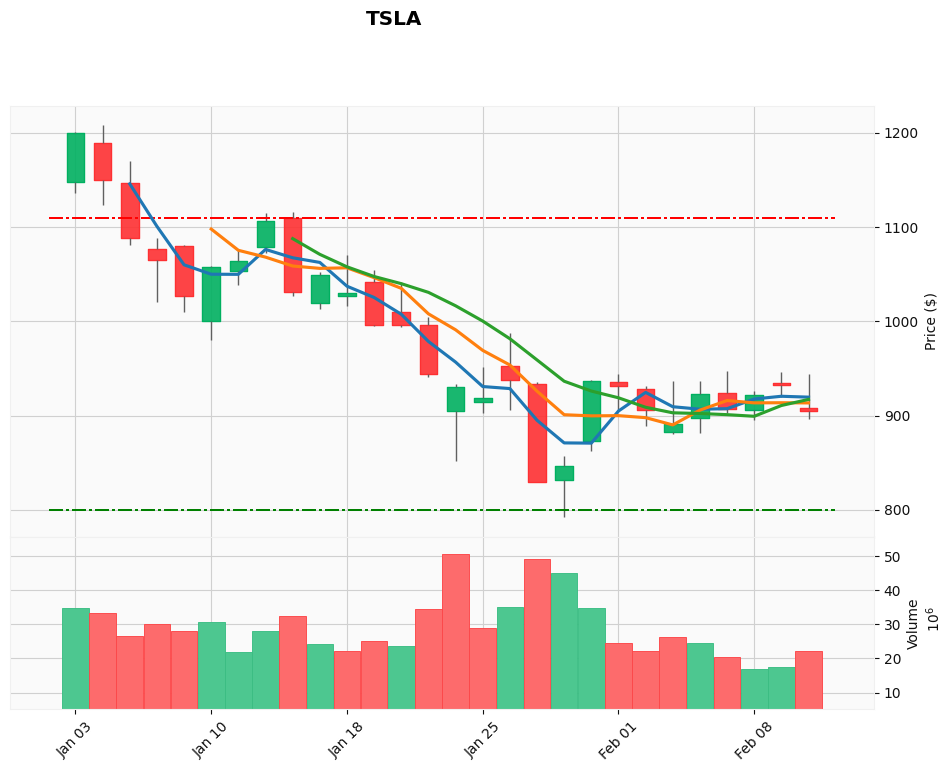

In [63]:
mpf.plot(data['2022':],
         type='candle',
         # style='nightclouds', # Black Neon 1 style
         # style='classic', # Black & White style
         # style='charles', # Green/Red Style
         # style='mike', # Black Neon 2 style
         style='yahoo', # Green/Red Better Style
         title='TSLA',
         ylabel='Price ($)',
         ylabel_lower='Volume',
         volume=True,
         
         mav=(3,6,9), # Moving Averages
         
         # lines=[63,72] # Support Resistance lines
         hlines=dict(hlines=[800,1110], colors=['g', 'r'], linestyle='-.'),

         # Tamaño del grafico
         figscale=1.5
         )

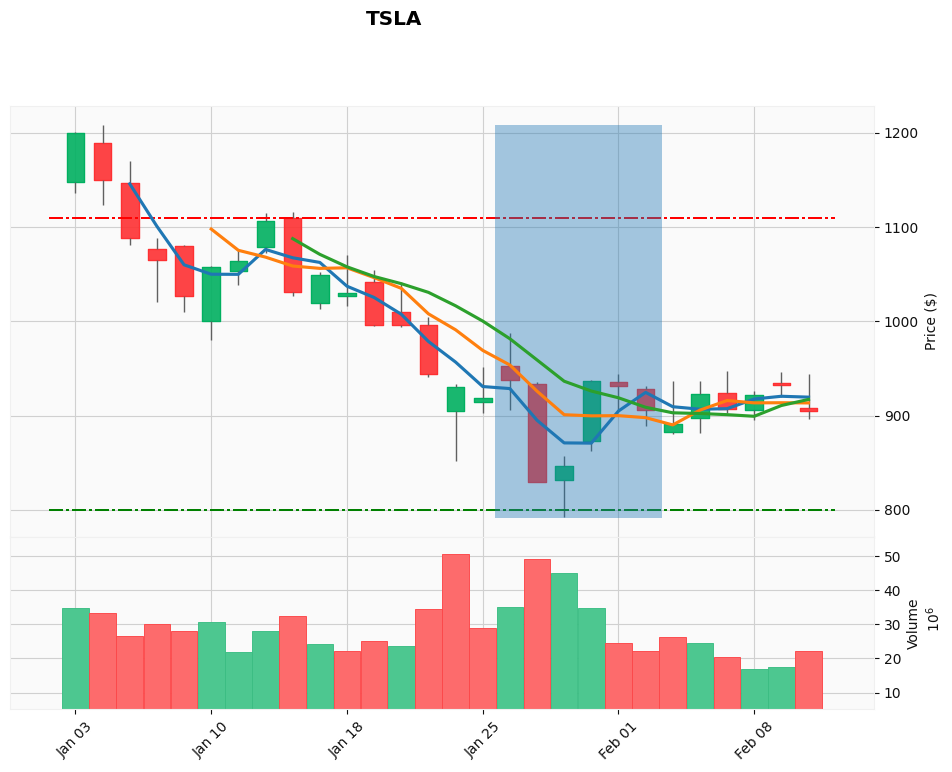

In [68]:
mpf.plot(data['2022':],
         type='candle',
         # style='nightclouds', # Black Neon 1 style
         # style='classic', # Black & White style
         # style='charles', # Green/Red Style
         # style='mike', # Black Neon 2 style
         style='yahoo', # Green/Red Better Style
         title='TSLA',
         ylabel='Price ($)',
         ylabel_lower='Volume',
         volume=True,
         
         mav=(3,6,9), # Moving Averages
         
         # lines=[63,72] # Lineas de Soporte y Resistencia
         hlines=dict(hlines=[800,1110], colors=['g', 'r'], linestyle='-.'),

         # Marcar un Area
         vlines=dict(vlines='2022-01-30', linewidths=120, alpha=0.4), # Vertical lines or Area Box

         # Tamaño del grafico
         figscale=1.5
         )

# Exportando / Guardando Graficos
Simplemente se añade: 
- **savefig=** *'--- path or name of the new file.png ---'* a los parametros del plot <br>*(Seguir el codigo de arriba)*
- **savefig=** *'--- ruta y nombre del nuevo archivo .png ---'* a los parametros del plot <br>*(Seguir el codigo de arriba)*

In [69]:
mpf.plot(data['2022':],
         type='candle',
         # style='nightclouds', # Black Neon 1 style
         # style='classic', # Black & White style
         # style='charles', # Green/Red Style
         # style='mike', # Black Neon 2 style
         style='yahoo', # Green/Red Better Style
         title='TSLA',
         ylabel='Price ($)',
         ylabel_lower='Volume',
         volume=True,
         
         mav=(3,6,9), # Moving Averages
         
         # lines=[63,72] # Lineas de Soporte y Resistencia
         hlines=dict(hlines=[800,1110], colors=['g', 'r'], linestyle='-.'),

         # Marcar un Area
         vlines=dict(vlines='2022-01-30', linewidths=120, alpha=0.4), # Vertical lines or Area Box

         # Tamaño del grafico
         figscale=1.5,
         savefig='/content/drive/MyDrive/Colab Notebooks/grafico1.png'
         )